In [4]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import math

In [6]:
data = pd.read_csv('info_dec_1.csv')

In [269]:
data

pkt  Channel   ant_info    phi_info    mag_info  theta_info  time_stamp
0       0        4  (-98+27j)  -74.596575  101.651365   -0.621650       10.00
1       0        4  (-77+64j)  -50.267697  100.124922   -0.418901       10.25
2       0        4  (-47+88j)  -28.106270   99.764723   -0.234220       10.50
3       0        4  (-10+99j)   -5.767889   99.503769   -0.048066       10.75
4       0        4   (93-45j)  115.820992  103.315052    0.965221       12.00
...   ...      ...        ...         ...         ...         ...         ...
9631   32       16    (2+78j)    1.468801   78.025637    0.012240     5144.75
9632   32       16   (60-43j)  125.627907   73.817342    1.046957     5146.00
9633   32       16   (37-65j)  150.350136   74.793048    1.253018     5146.25
9634   32       16   (13-74j)  170.036196   75.133215    1.417113     5146.50
9635   32       16  (-16-73j) -167.637508   74.732858   -1.397118     5146.75

[9636 rows x 7 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AD8FE66848>],
      dtype=object)

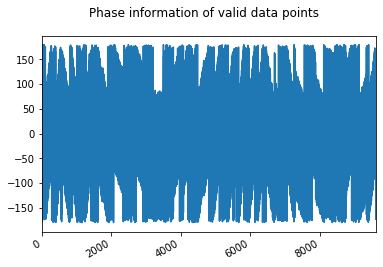

In [270]:
data['phi_info'].plot(subplots=True, title="Phase information of valid data points")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AD99642848>],
      dtype=object)

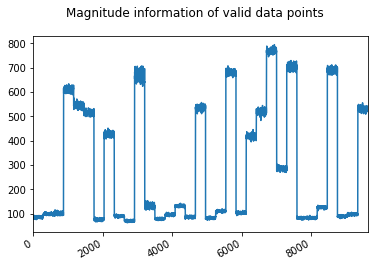

In [241]:
data['mag_info'].plot(subplots=True, title="Magnitude information of valid data points")

# Groupping the data pased on channel
Here I grouped the data based on it's cahnnel. Each graph represents the phase info in each channel. Yet I don't undrestand why it looks like this? Plus, I can't relate to the x grid!  

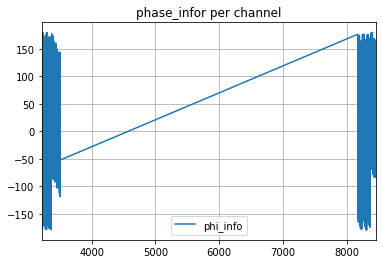

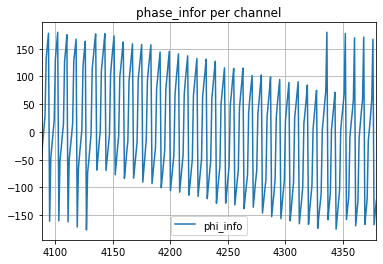

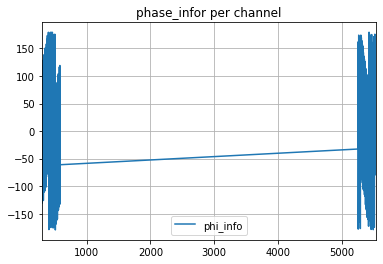

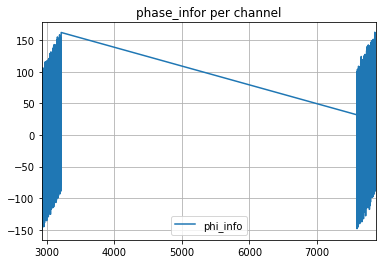

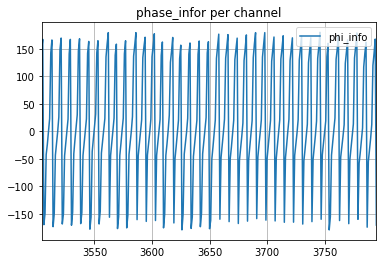

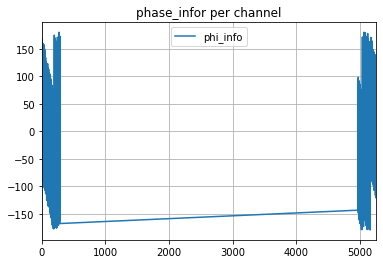

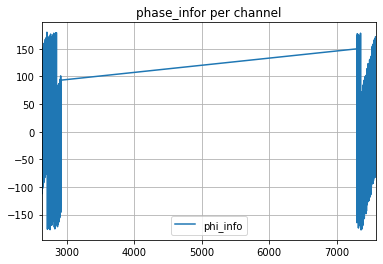

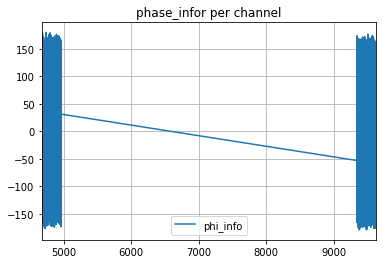

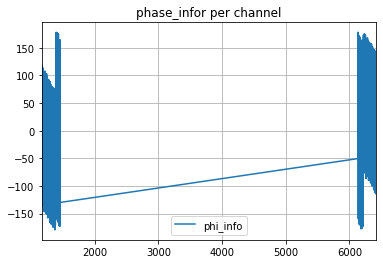

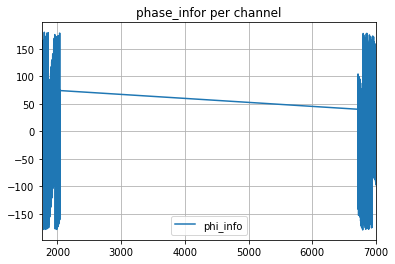

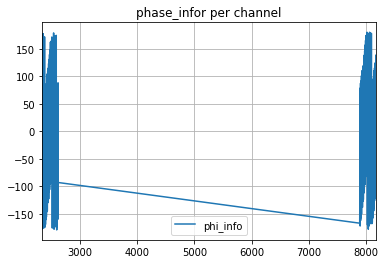

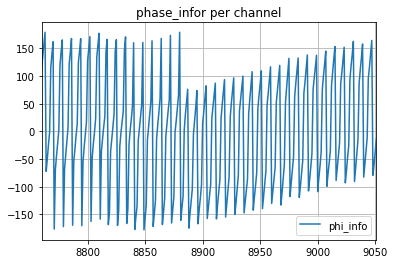

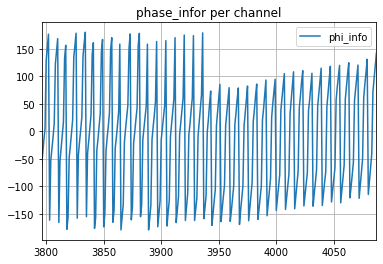

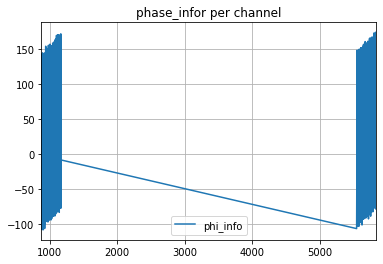

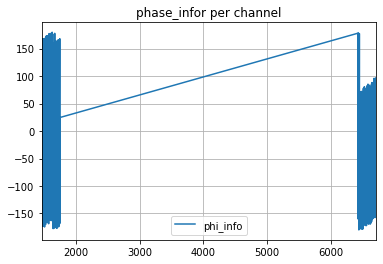

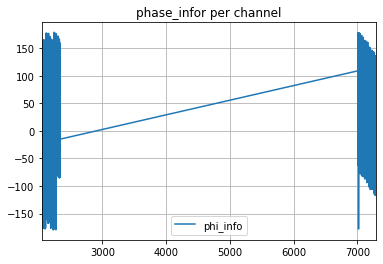

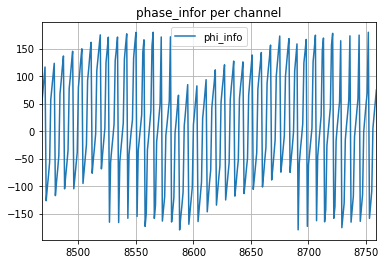

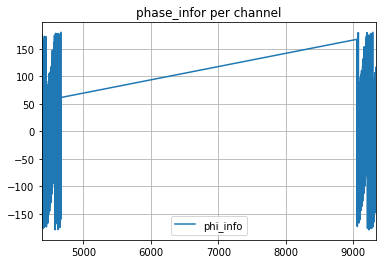

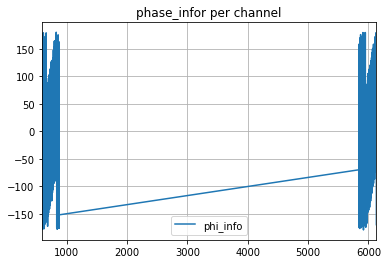

In [242]:
grouped = data.groupby('Channel')
axes = grouped[['phi_info']].plot(title="phase_infor per channel", grid=True)

In [243]:
indexed = data.set_index(['Channel'])
indexed

pkt     ant_info    phi_info    mag_info  theta_info  time_stamp
Channel                                                                  
11         0    (-79+21j)  -75.113733   81.743501   -0.625960       10.00
11         0    (-63+51j)  -51.009006   81.055537   -0.425079       10.25
11         0    (-42+68j)  -31.701430   79.924965   -0.264180       10.50
11         0    (-15+77j)  -11.023456   78.447435   -0.091862       10.75
11         0     (88-16j)  100.304846   89.442719    0.835903       12.00
...      ...          ...         ...         ...         ...         ...
18        32   (-33-518j) -176.354809  519.050094   -1.469785     5144.75
18        32  (-474+232j)  -63.920495  527.730992   -0.532678     5146.00
18        32  (-357+387j)  -42.690937  526.514957   -0.355760     5146.25
18        32  (-164+499j)  -18.193487  525.258984   -0.151613     5146.50
18        32    (39+525j)    4.248455  526.446578    0.035404     5146.75

[9636 rows x 6 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AD9AD70648>],
      dtype=object)

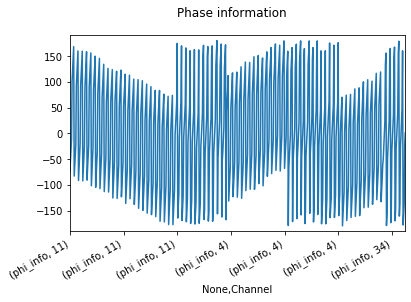

In [244]:
indexed.unstack(level=0)[['phi_info']].plot(subplots=True, title="Phase information", xlim=[0,624], ylim=[-190,+190])

Here is the Phase change in each channel! the phase increases to 180 and then drops down after each sample. 
The max and min is the range of change of phase. 
Here we didn't separate the antennas in each array. as a result, the data we see is: A1 A2 A3 A4, A1 A2 A3 A4, ... 
this happens 73 tims! 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AD99C67CC8>],
      dtype=object)

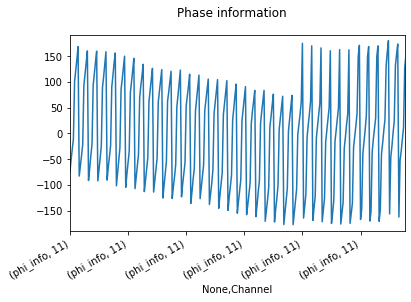

In [245]:
indexed.unstack(level=0)[['phi_info']].plot(subplots=True, title="Phase information", xlim=[0,288], ylim=[-190,+190])

## here is the Magnitude of the valid IQ samples per channel. This mag stays the say at each channel! 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AD9682E588>],
      dtype=object)

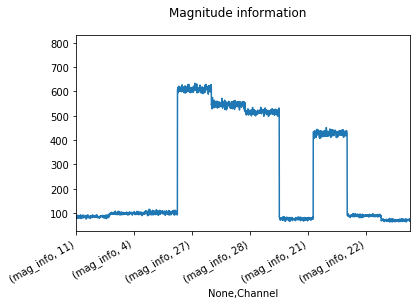

In [246]:
indexed.unstack(level=0)[['mag_info']].plot(subplots=True, title="Magnitude information", xlim=[0,288*10])

# Now adding the frequency for each channel
first, introducing w as center frequency of each channel!

In [247]:
w = []
for n in range(0,11):
    w.append((2404.25 + n*2)*(360*10**-6))
for n in range(11, 37):
    w.append((2428.25 + (n-11)*2)*(360*10**-6))
print(w)

[0.8655299999999999, 0.86625, 0.8669699999999999, 0.86769, 0.8684099999999999, 0.86913, 0.8698499999999999, 0.87057, 0.8712899999999999, 0.87201, 0.8727299999999999, 0.8741699999999999, 0.87489, 0.8756099999999999, 0.8763299999999999, 0.8770499999999999, 0.8777699999999999, 0.8784899999999999, 0.8792099999999999, 0.8799299999999999, 0.8806499999999999, 0.8813699999999999, 0.8820899999999999, 0.8828099999999999, 0.8835299999999999, 0.8842499999999999, 0.8849699999999999, 0.88569, 0.8864099999999999, 0.88713, 0.8878499999999999, 0.88857, 0.8892899999999999, 0.89001, 0.8907299999999999, 0.89145, 0.8921699999999999]


In [95]:
# channel = np.arange(0,37,1)
# BLE_freq = pd.DataFrame({"Channel":channel, "Frequency": w})
# BLE_freq['Frequency'] = BLE_freq['Frequency']*360*10**-6

In [248]:
channel = np.arange(0,37,1)
ble_dict=[]
for c, f in zip(channel,w):
    ble_dict.append({c:f})
zip_iterator = zip(channel, w)
a_dict = dict(zip_iterator)
a_dict[14]

0.8763299999999999

# sampling time per channel ~ 160us
Here I manually am changing the sampling time per channel. Because it will create extra turns along the 360 degrees if we multiply the actuall data. 
As a result, I only multiply once the time is between 10us to 160us 
### Timing per pkt
- 4us : guard (no sampling here)
- 8us : the reference with 32 samples (sampling starts here)
- 157us: sampling happens here, also the switching time is here. each 1us has 4 sampls. as a result we have 292 sampls finally. in each pkt with 4 antenna, only 288 of this data is a complete period of ant_array. 

In [305]:
data['time_per_channel'] = data['time_stamp']
for i in range(0, len(data)- 292, 292):
    data['time_per_channel'][i+292:i+2*292] = data['time_stamp'][0:292]
   

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [250]:
data[292*32-1:292*32+ 292]

pkt  Channel     ant_info    phi_info    mag_info  theta_info  \
9343   31       32     (83-42j)  116.840510   93.021503    0.973718   
9344   32       18  (-414+312j)  -52.997473  518.401389   -0.441650   
9345   32       18  (-252+450j)  -29.248826  515.755756   -0.243741   
9346   32       18   (-23+519j)   -2.537459  519.509384   -0.021145   
9347   32       18   (182+494j)   20.224859  526.459875    0.168541   
...   ...      ...          ...         ...         ...         ...   
9631   32       18   (-33-518j) -176.354809  519.050094   -1.469785   
9632   32       18  (-474+232j)  -63.920495  527.730992   -0.532678   
9633   32       18  (-357+387j)  -42.690937  526.514957   -0.355760   
9634   32       18  (-164+499j)  -18.193487  525.258984   -0.151613   
9635   32       18    (39+525j)    4.248455  526.446578    0.035404   

      time_stamp  time_per_channel  
9343     4990.75            154.75  
9344     5002.00             10.00  
9345     5002.25             10.25  
9346     5002.50             10.50  
9347     5002.75             10.75  
...          ...               ...  
9631     5144.75            152.75  
9632     5146.00            154.00  
9633     5146.25            154.25  
9634     5146.50            154.50  
9635     5146.75            154.75  

[293 rows x 8 columns]

 # w is in radian --> omegat in angle = omegat(rad)* 180/pi)

In [306]:
time = []
data['wt_per_cahnnel'] = data['time_per_channel']
for channel in channle_list:
    channel_posi = np.where(data['Channel'] == channel)
    ble_chan_ferq = np.where(BLE_freq['Channel'] == channel)
#     print(ble_chan_ferq[0])
    for posi in channel_posi:
#         time = (360*a_dict[channel]*1e-6*data['time_per_channel'][posi])
        time.append((a_dict[channel]*data['time_per_channel'][posi]))
        data['wt_per_cahnnel'][posi] = (a_dict[channel]*data['time_per_channel'][posi])
    
        print('BLE_Frequency ', a_dict[channel], channel)

BLE_Frequency  0.8763299999999999 14
BLE_Frequency  0.88713 29
BLE_Frequency  0.8792099999999999 18
BLE_Frequency  0.86769 3
BLE_Frequency  0.8806499999999999 20
BLE_Frequency  0.87201 9
BLE_Frequency  0.8842499999999999 25
BLE_Frequency  0.89145 35
BLE_Frequency  0.8835299999999999 24
BLE_Frequency  0.8756099999999999 13
BLE_Frequency  0.8669699999999999 2
BLE_Frequency  0.8684099999999999 4
BLE_Frequency  0.8878499999999999 30
BLE_Frequency  0.8799299999999999 19
BLE_Frequency  0.8712899999999999 8
BLE_Frequency  0.8907299999999999 34
BLE_Frequency  0.8828099999999999 23
BLE_Frequency  0.87057 7
BLE_Frequency  0.89001 33
BLE_Frequency  0.8820899999999999 22
BLE_Frequency  0.8864099999999999 28
BLE_Frequency  0.8892899999999999 32
BLE_Frequency  0.8813699999999999 21
BLE_Frequency  0.8727299999999999 10


C:\Users\pooneh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


# Calculating the phase with respect to the time
For each channel, the wt (omega.t) is calculated separatly. This value is in radian. So, we concert it to degrees by: * 180/pi
As a result, the answer will be between -180 to 180 degrees. 
Yet, if:
real_phi = phi_info - wt_per_channel 
no furthur calculations is needed. 
- Now the angle will be between -360 to +360 degrees! 
why? because:
    -180< phi_info<+180
    -180 < -wt_per_channel< +180
therefore --> -180< phi_info<+180 + -180 < -wt_per_channel< +180 --> -360 < real_phi < +360

In [307]:
data['real_phase'] =  data['wt_per_cahnnel'] - data['phi_info']
# print(data[299:588])
# print(a_dict[29]*data['time_per_channel'][300], a_dict[29])
data

pkt  Channel     ant_info    phi_info    mag_info  theta_info  \
0       0       11    (-79+21j)  -75.113733   81.743501   -0.625960   
1       0       11    (-63+51j)  -51.009006   81.055537   -0.425079   
2       0       11    (-42+68j)  -31.701430   79.924965   -0.264180   
3       0       11    (-15+77j)  -11.023456   78.447435   -0.091862   
4       0       11     (88-16j)  100.304846   89.442719    0.835903   
...   ...      ...          ...         ...         ...         ...   
9631   32       18   (-33-518j) -176.354809  519.050094   -1.469785   
9632   32       18  (-474+232j)  -63.920495  527.730992   -0.532678   
9633   32       18  (-357+387j)  -42.690937  526.514957   -0.355760   
9634   32       18  (-164+499j)  -18.193487  525.258984   -0.151613   
9635   32       18    (39+525j)    4.248455  526.446578    0.035404   

      time_stamp  time_per_channel  wt_per_cahnnel  real_phase  
0          10.00             10.00       10.000000   85.113733  
1          10.25             10.25       10.250000   61.259006  
2          10.50             10.50       10.500000   42.201430  
3          10.75             10.75       10.750000   21.773456  
4          12.00             12.00       12.000000  -88.304846  
...          ...               ...             ...         ...  
9631     5144.75            152.75      134.299328  310.654136  
9632     5146.00            154.00      135.398340  199.318835  
9633     5146.25            154.25      135.618142  178.309080  
9634     5146.50            154.50      135.837945  154.031432  
9635     5146.75            154.75      136.057747  131.809293  

[9636 rows x 10 columns]

# Converting the angle to the [-180, 180] range:

In [308]:
for i in range(len(data)):
    if data['real_phase'][i] < 0:
        data['real_phase'][i] = data['real_phase'][i] + 360
data

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


pkt  Channel     ant_info    phi_info    mag_info  theta_info  \
0       0       11    (-79+21j)  -75.113733   81.743501   -0.625960   
1       0       11    (-63+51j)  -51.009006   81.055537   -0.425079   
2       0       11    (-42+68j)  -31.701430   79.924965   -0.264180   
3       0       11    (-15+77j)  -11.023456   78.447435   -0.091862   
4       0       11     (88-16j)  100.304846   89.442719    0.835903   
...   ...      ...          ...         ...         ...         ...   
9631   32       18   (-33-518j) -176.354809  519.050094   -1.469785   
9632   32       18  (-474+232j)  -63.920495  527.730992   -0.532678   
9633   32       18  (-357+387j)  -42.690937  526.514957   -0.355760   
9634   32       18  (-164+499j)  -18.193487  525.258984   -0.151613   
9635   32       18    (39+525j)    4.248455  526.446578    0.035404   

      time_stamp  time_per_channel  wt_per_cahnnel  real_phase  
0          10.00             10.00       10.000000   85.113733  
1          10.25             10.25       10.250000   61.259006  
2          10.50             10.50       10.500000   42.201430  
3          10.75             10.75       10.750000   21.773456  
4          12.00             12.00       12.000000  271.695154  
...          ...               ...             ...         ...  
9631     5144.75            152.75      134.299328  310.654136  
9632     5146.00            154.00      135.398340  199.318835  
9633     5146.25            154.25      135.618142  178.309080  
9634     5146.50            154.50      135.837945  154.031432  
9635     5146.75            154.75      136.057747  131.809293  

[9636 rows x 10 columns]

### Now convert to [-180,180] range
Now for phi > 180, the values should be diffrenciated by 360. As a result the total will be between [-180,180]

In [309]:
for i in range(len(data)):
    if data['real_phase'][i] > 180:
        data['real_phase'][i] = data['real_phase'][i] - 360
data

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


pkt  Channel     ant_info    phi_info    mag_info  theta_info  \
0       0       11    (-79+21j)  -75.113733   81.743501   -0.625960   
1       0       11    (-63+51j)  -51.009006   81.055537   -0.425079   
2       0       11    (-42+68j)  -31.701430   79.924965   -0.264180   
3       0       11    (-15+77j)  -11.023456   78.447435   -0.091862   
4       0       11     (88-16j)  100.304846   89.442719    0.835903   
...   ...      ...          ...         ...         ...         ...   
9631   32       18   (-33-518j) -176.354809  519.050094   -1.469785   
9632   32       18  (-474+232j)  -63.920495  527.730992   -0.532678   
9633   32       18  (-357+387j)  -42.690937  526.514957   -0.355760   
9634   32       18  (-164+499j)  -18.193487  525.258984   -0.151613   
9635   32       18    (39+525j)    4.248455  526.446578    0.035404   

      time_stamp  time_per_channel  wt_per_cahnnel  real_phase  
0          10.00             10.00       10.000000   85.113733  
1          10.25             10.25       10.250000   61.259006  
2          10.50             10.50       10.500000   42.201430  
3          10.75             10.75       10.750000   21.773456  
4          12.00             12.00       12.000000  -88.304846  
...          ...               ...             ...         ...  
9631     5144.75            152.75      134.299328  -49.345864  
9632     5146.00            154.00      135.398340 -160.681165  
9633     5146.25            154.25      135.618142  178.309080  
9634     5146.50            154.50      135.837945  154.031432  
9635     5146.75            154.75      136.057747  131.809293  

[9636 rows x 10 columns]

# Plots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AD96BA7308>],
      dtype=object)

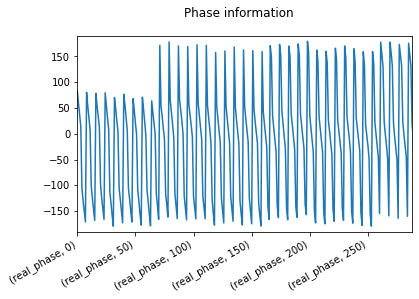

In [276]:
data.unstack(level=0)[['real_phase']].plot(subplots=True, title="Phase information", xlim=[0,288], ylim=[-190, +190])

In [310]:
data.to_csv('time_added_data_1.csv', index = False)

## Separating each antenna per channel

In [300]:
data_size = len(data)
N = int(data_size/288)
info_per_ant = []
for n in range(N):
    for k in range(0 + n*288, 288*(n+1), 4):
        info_per_ant.append({"pkt": data['pkt'][k], 
                             "channel": data['Channel'][k], 
                             "phi_ant1": data['real_phase'][k + 3],
                             "phi_ant2": data['real_phase'][k], 
                             "phi_ant3": data['real_phase'][k + 1], 
                             "phi_ant4": data['real_phase'][k + 2]})
result = pd.DataFrame(info_per_ant)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AD96B2D448>],
      dtype=object)

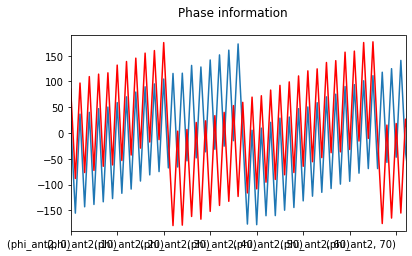

In [262]:
result.unstack(level=0)[['phi_ant1']].plot(subplots=True, title="Phase information", xlim=[0,72], ylim=[-190,+190])
result.unstack(level=0)[['phi_ant2']].plot(subplots=True, title="Phase information", xlim=[0,72], ylim=[-190,+190], color = 'red')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AD96CB3E88>],
      dtype=object)

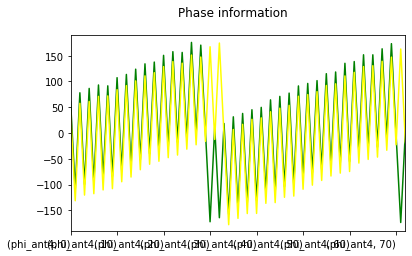

In [263]:
result.unstack(level=0)[['phi_ant3']].plot(subplots=True, title="Phase information", xlim=[0,72], ylim=[-190,+190], color = 'green')
result.unstack(level=0)[['phi_ant4']].plot(subplots=True, title="Phase information", xlim=[0,72], ylim=[-190,+190], color = 'yellow')

In [264]:
phi_3 = result['phi_ant3'][0:72]
phi_2 = result['phi_ant2'][0:72] 
phi_1 = result['phi_ant1'][0:72]
phi_4 = result['phi_ant4'][0:72] 
print(np.average(phi_1), np.average(phi_2), np.average(phi_3), np.average(phi_4))

-6.9085181097288615 3.865180704656587 11.852135510978403 5.049124875605951


In [301]:
phi_channel = []
for i in range(0, len(result), 72):
    phi_channel.append({"pkt": result['pkt'][i], "channel":result['channel'][i], 
                       "ave_phi1": np.average(result['phi_ant1'][i-72:i]),
                       "ave_phi2": np.average(result['phi_ant2'][i-72:i]), 
                       "ave_phi3": np.average(result['phi_ant3'][i-72:i]),
                       "ave_phi4": np.average(result['phi_ant4'][i-72:i])})
average_phi_perchannel = pd.DataFrame(phi_channel)
average_phi_perchannel=  average_phi_perchannel.drop([0])
         

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [302]:
average_phi_perchannel.to_csv('average_phi_perchannel_1.csv', index = False) 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AD8E66FA08>],
      dtype=object)

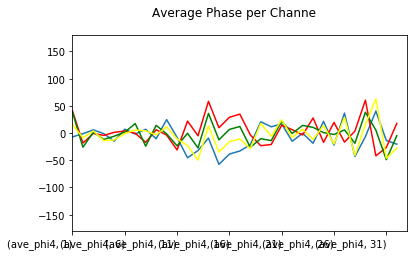

In [303]:
average_phi_perchannel.unstack(level=0)[['ave_phi1']].plot(subplots=True, title="Average Phase per Channel", xlim=[0,32], ylim=[-180,+180])
average_phi_perchannel.unstack(level=0)[['ave_phi2']].plot(subplots=True, title="Average Phase per Channe", xlim=[0,32], ylim=[-180,+180], color = 'red')
average_phi_perchannel.unstack(level=0)[['ave_phi3']].plot(subplots=True, title="Average Phase per Channe", xlim=[0,32], ylim=[-180,+180], color = 'green')
average_phi_perchannel.unstack(level=0)[['ave_phi4']].plot(subplots=True, title="Average Phase per Channe", xlim=[0,32], ylim=[-180,+180], color = 'yellow')

In [267]:
print('Ant1_phi_average',  np.average(average_phi_perchannel['ave_phi1']), 
     '\nAnt2_phi_average', np.average(average_phi_perchannel['ave_phi2']), 
     '\nAnt3_phi_average', np.average(average_phi_perchannel['ave_phi3']),
     '\nAnt4_phi_average', np.average(average_phi_perchannel['ave_phi4']))

Ant1_phi_average 4.526636787036233 
Ant2_phi_average -3.805979999276248 
Ant3_phi_average -4.447956209900189 
Ant4_phi_average 4.114245964793544
